In [1]:
import pandas as pd
from  sklearn.preprocessing  import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Food_impact_india.csv")

In [3]:
df.head(5)

,Person_ID,Age,Gender,Region,Diet_Type,Primary_Cuisine,Spice_Level,Daily_Calorie_Intake,Health_Impact,Common_Diseases,Exercise_Level,BMI,Food_Frequency,Sugar_Intake,Salt_Intake,Health_Score
0,1,56,Female,East,Vegetarian,Gujarati,High,2768,Positive,Diabetes,Sedentary,37.3,5,Low,High,30
1,2,69,Male,Central,Vegetarian,North Indian,Low,3005,Positive,Obesity,Moderate,38.4,3,Low,Moderate,95
2,3,46,Male,South,Vegetarian,Maharashtrian,Medium,3416,Positive,Diabetes,Sedentary,19.6,4,High,Low,86
3,4,32,Female,West,Vegan,North Indian,Medium,1572,Neutral,NaN,Moderate,32.5,5,Low,Low,81
4,5,60,Male,East,Non-Vegetarian,Gujarati,Medium,2539,Negative,Diabetes,Moderate,30.4,4,High,Moderate,37


In [5]:
df.shape

(17686, 16)

In [6]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
cat_columns=['Spice_Level','Health_Impact','Exercise_Level','Sugar_Intake','Salt_Intake']
df[cat_columns]=oe.fit_transform(df[cat_columns])

In [7]:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse_output=False,drop="first")  # set sparse=False to get a dense array

cat_columns2 = ['Gender','Diet_Type','Common_Diseases','Region','Primary_Cuisine']

# Fit & transform
encoded = ohe.fit_transform(df[cat_columns2])

# Convert to DataFrame with correct column names
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cat_columns2), index=df.index)

# Drop original columns and concatenate
df = df.drop(columns=cat_columns2)
df = pd.concat([df, encoded_df], axis=1)

In [8]:
df.head()

,Person_ID,Age,Spice_Level,Daily_Calorie_Intake,Health_Impact,Exercise_Level,BMI,Food_Frequency,Sugar_Intake,Salt_Intake,...,Region_East,Region_North,Region_South,Region_West,Primary_Cuisine_Gujarati,Primary_Cuisine_Maharashtrian,Primary_Cuisine_North Indian,Primary_Cuisine_Punjabi,Primary_Cuisine_Rajasthani,Primary_Cuisine_South Indian
0,1,56,0.0,2768,2.0,2.0,37.3,5,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,69,1.0,3005,2.0,1.0,38.4,3,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,46,2.0,3416,2.0,2.0,19.6,4,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,32,2.0,1572,1.0,1.0,32.5,5,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,60,2.0,2539,0.0,1.0,30.4,4,0.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df["sugar&salt"]=(df["Salt_Intake"]+df["Sugar_Intake"]+df["Spice_Level"])/2

In [10]:
X=df.drop(columns=["Person_ID","Health_Score"])
y=df["Health_Score"]

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [12]:
X_train

,Age,Spice_Level,Daily_Calorie_Intake,Health_Impact,Exercise_Level,BMI,Food_Frequency,Sugar_Intake,Salt_Intake,Gender_Male,...,Region_North,Region_South,Region_West,Primary_Cuisine_Gujarati,Primary_Cuisine_Maharashtrian,Primary_Cuisine_North Indian,Primary_Cuisine_Punjabi,Primary_Cuisine_Rajasthani,Primary_Cuisine_South Indian,sugar&salt
8647,34,0.0,3425,0.0,0.0,33.7,3,1.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.5
15213,29,0.0,1616,0.0,2.0,21.8,4,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8406,51,1.0,2457,1.0,2.0,30.6,1,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.5
3169,65,1.0,3253,2.0,2.0,37.2,6,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
13119,27,2.0,1873,2.0,2.0,28.3,2,2.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,2.0,1790,2.0,0.0,32.3,4,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.5
11964,36,2.0,2377,2.0,1.0,21.5,5,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
5390,39,2.0,3370,1.0,2.0,36.7,2,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.5
860,51,2.0,2817,1.0,0.0,27.1,5,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.5


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)
r2_score(y_test,y_pred1)

-0.00019700672064426605

In [ ]:
import statsmodels.api as sm

In [29]:
X_train = sm.add_constant(X_train)  # add intercept
model = sm.OLS(y_train, X_train).fit()

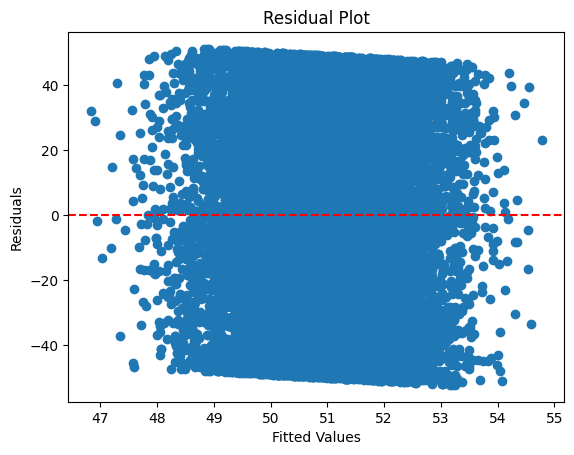

In [30]:

plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()